# Linear Regression

Linear regression is a fundamental and widely used statistical technique in data analysis and machine learning. It is a powerful tool for **modeling and understanding the relationships between variables**. At its core, linear regression aims to establish a linear relationship between a **dependent variable** (the one you want to predict) and **one or more independent variables** (the ones used for prediction). This technique allows us to make predictions, infer associations, and gain insights into how changes in independent variables influence the target variable. Linear regression is both intuitive and versatile, making it a valuable tool for tasks ranging from simple trend analysis to more complex predictive modeling and hypothesis testing. 

In this context, we will explore the concepts and applications of linear regression, its different types, and how to implement it using Python.

## The Auto MPG Dataset

We will consider the [Auto MPG](https://archive.ics.uci.edu/dataset/9/auto+mpg) dataset, which contains $398$ measurements of $8$ different properties of different cars:

In [3]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
auto_mpg = fetch_ucirepo(id=9) 
  
# data (as pandas dataframes) 
X = auto_mpg.data.features 
y = auto_mpg.data.targets 
  
data = X.join(y)
data


,displacement,cylinders,horsepower,weight,acceleration,model_year,origin,mpg
0,307.0,8,130.0,3504,12.0,70,1,18.0
1,350.0,8,165.0,3693,11.5,70,1,15.0
2,318.0,8,150.0,3436,11.0,70,1,18.0
3,304.0,8,150.0,3433,12.0,70,1,16.0
4,302.0,8,140.0,3449,10.5,70,1,17.0
...,...,...,...,...,...,...,...,...
393,140.0,4,86.0,2790,15.6,82,1,27.0
394,97.0,4,52.0,2130,24.6,82,2,44.0
395,135.0,4,84.0,2295,11.6,82,1,32.0
396,120.0,4,79.0,2625,18.6,82,1,28.0


Here is a description of the different variables:

* **Displacement**: The engine's displacement (in cubic inches), which indicates the engine's size and power.
* **Cylinders**: The number of cylinders in the engine of the car. This is a categorical variable.
* **Horsepower**: The engine's horsepower, a measure of the engine's performance.
* **Weight**: The weight of the car in pounds.
* **Acceleration**: The car's acceleration (in seconds) from 0 to 60 miles per hour.
* **Model Year**: The year the car was manufactured. This is often converted into a categorical variable representing the car's age.
* **Origin**: The car's country of origin or manufacturing.
Car Name: The name or identifier of the car model.
* **MPG (Miles per Gallon)**: The fuel efficiency of the car in miles per gallon. It is the variable to be predicted in regression analysis.

We will start by exploring the relationship between the variables `horsepower` and `MPG`. Let's visualize the related scatterplot:

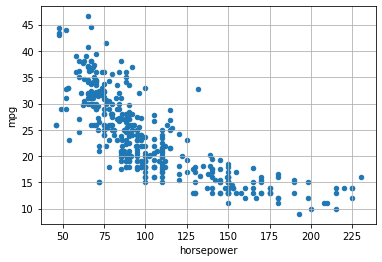

In [3]:
from matplotlib import pyplot as plt
data.plot.scatter(x='horsepower', y='mpg')
plt.grid()
plt.show()

## Regression Models
Regression models, in general, aim to **study the relationship between two variables**, $X$ and $Y$, by defining a mathematical model $f$ such that:

$$Y=f(X) + \epsilon$$

Here:
* $f$ is a deterministic function which can be used to **predict the values of $Y$ from the values of $X$**;
* $\epsilon$ is an **error term**, i.e., a variable capturing everything that is not captured by the deterministic function $f$. It can be due to different reasons, the main of which are:
  * $f$ is not an accurate deterministic function of the process. Since we don't know the "true" function $f$ and we are only estimating it, we may obtain a suboptimal $f$ for which $Y \neq f(X)$. The error term captures the differences between our predictions and the true values.
  * $Y$ cannot only be predicted from $X$, but some other variable is needed to correctly predict $Y$ from $X$. For instance, $X$ could be "years of education" and $Y$ can be "income". While may expect that "income" is not completely predicted from "years of education". This can happen also because we don't always have observations for all relevant variables.
  * the problem has inherent stochasticity which cannot be entirely modeled within the deterministic function $f$. For instance, consider the problem of predicting the rate of wins in poker based on the expertise of the player. The expertise surely allows to predict the rate of wins, but wins partially depend also on random factors, such as how the deck was shuffled.

Note that, often, we model $f$ in a way that we have its **analytical form**. This is very powerful. If we have the analytical form of the function $f$ which **explains** how $Y$ is influenced from $X$ (**can be predicted from $X$**), then we can really understand deeply the connection between the two variables!

The function $f$ can take different forms. The most common one is the **linear form** that we will see in the next section. While the linear form is very simple (and hence we can anticipate it will be a limited model in many cases), it has the great advantage to be **easy to interpret**.

## Simple Linear Regression
Simple linear regression aims to model the **linear relationship** between two variables $X$ and $Y$. In our example dataset, we will consider $X=\text{horsepower}$ and $Y=\text{mpg}$.

Since we are trying to model a linear relationship, we can imagine **a line passing through the data**. The simple linear regression model is defined as:

$$Y \approx \beta_0 + \beta_1X$$

In our example:

$$\text{mpg} \approx \beta_0 + \beta_1 \text{horsepower}$$

It is often common to introduce a **"noise" variable** which captures the randomness due to which the expression above is approximated and write:

$$Y = \beta_0 + \beta_1X + \epsilon$$

As we will see later, we expect $\epsilon$ to be **small and randomly distributed**.

Given the model above, we will call:

* $X$, the **independent variable** or **regressor**;
* $Y$, the **dependent variable** or **regressed variable**.

The values $\beta_0$ and $\beta_1$ are called **coefficients** or **parameters** of the model.

The mathematical model above has a geometrical interpretation. Indeed, specific values of $\beta_0$ and $\beta_1$ identify a given line in the 2D plane, as shown in the plot below:

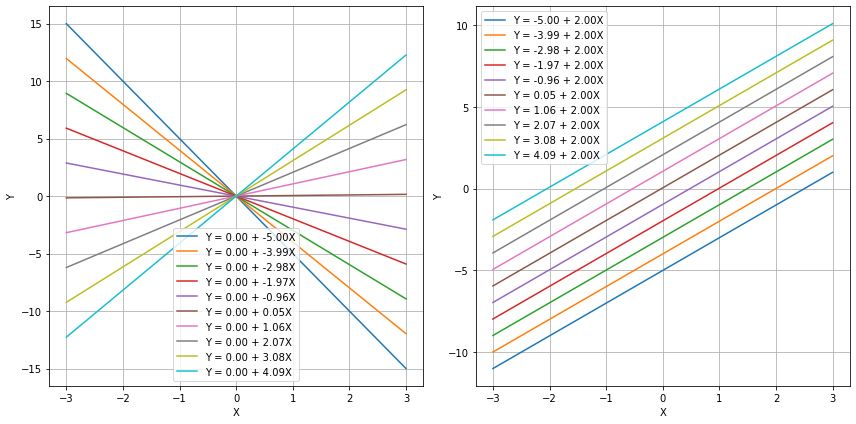

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Generate example data points
X = np.linspace(-3, 3, 100)
Y = np.linspace(-3, 3, 100)

# Create a range of values for beta_1 (keeping beta_0 fixed at 0)
beta_0_fixed = 0
beta_1_values = np.linspace(-5, 5, 100)

# Create a range of values for beta_0 (keeping beta_1 fixed at 2)
beta_1_fixed = 2
beta_0_values = np.linspace(-5, 5, 100)

# Calculate the corresponding Y values for each combination of beta_0 and beta_1
Y_pred_beta1 = beta_0_fixed + beta_1_values * X[:, np.newaxis]
Y_pred_beta0 = beta_0_values + beta_1_fixed * X[:, np.newaxis]

# Create a figure with two subplots
plt.figure(figsize=(12, 6))

# First subplot: Varying beta_1 with fixed beta_0
plt.subplot(1, 2, 1)
for i in range(0, len(beta_1_values), 10):
    plt.plot(X, Y_pred_beta1[:, i], label=f'Y = {beta_0_fixed:.2f} + {beta_1_values[i]:.2f}X')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)

# Second subplot: Varying beta_0 with fixed beta_1
plt.subplot(1, 2, 2)
for i in range(0, len(beta_0_values), 10):
    plt.plot(X, Y_pred_beta0[:, i], label=f'Y = {beta_0_values[i]:.2f} + {beta_1_fixed:.2f}X')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


We hence aim to estimate two appropriate values $\hat \beta_0$ and $\hat \beta_1$ from data in a way that they provide a model which represents well our data. In the case of our example, we expect the geometrical model to have this aspect:

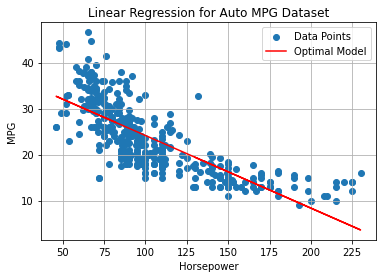

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Extract the "horsepower" and "mpg" variables
X = data.dropna()["horsepower"].values.reshape(-1, 1)
y = data.dropna()["mpg"].values

# Perform linear regression
reg = LinearRegression().fit(X, y)
y_pred = reg.predict(X)

# Create a scatter plot of the data points
plt.scatter(X, y, label="Data Points")

# Plot the regression line in red
plt.plot(X, y_pred, color="red", label="Optimal Model")

plt.xlabel("Horsepower")
plt.ylabel("MPG")
plt.title("Linear Regression for Auto MPG Dataset")
plt.legend()
plt.grid(True)
plt.show()


This line will also be called the **regression line**.

### Estimating the Coefficients - Ordinary Least Squares (OLS)

To estimate the coefficients of our optimal model, we should first define what is a good model. We will say that **a good model is one that predicts well the $Y$ variable from the $X$ one**. We already know from the example above that, since the relationship is not perfectly linear, the model will make some mistakes. 

Let $\{(x_i,y_i)\}$ be our set of observations. Let

$$\hat y_i = \hat \beta_0 + \hat \beta_1 x_i$$

be the prediction of the model for the observation $x_i$. For each data point $(x_i,y_i)$, we will define the deviation of the prediction from the $y_i$ value as follows:

$$e_i = y_i - \hat y_i$$

These numbers will be positive or negative based on whether we underestimate or overestimate the $y_i$ values. As a global error indicator for the model, given the data, we will define the **residual sum of squares (RSS)** as:

$$RSS = e_1^2 + e_2^2 + \ldots + e_n^2 $$

or equivalently:

$$RSS = (y_1 - \hat \beta_0 - \hat \beta_1 x_1)^2 + (y_2 - \hat \beta_0 - \hat \beta_1 x_2)^2 + \ldots + (y_n - \hat \beta_0 - \hat \beta_1 x_n)^2$$

This number will be the sum of the square values of the dashed segments in the plot below:

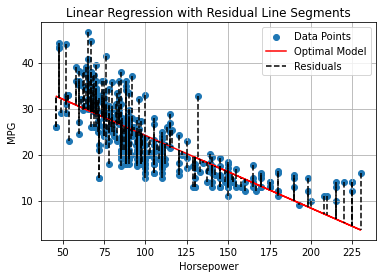

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Extract the "horsepower" and "mpg" variables
X = data.dropna()["horsepower"].values.reshape(-1, 1)
y = data.dropna()["mpg"].values

# Perform linear regression
reg = LinearRegression().fit(X, y)
y_pred = reg.predict(X)

# Calculate the residuals
residuals = y - y_pred

# Create a scatter plot of the data points
plt.scatter(X, y, label="Data Points")

# Plot the regression line in red
plt.plot(X, y_pred, color="red", label="Optimal Model")

bool = True
# Plot residual line segments
for xi, yi, residual in zip(X, y, residuals):
    if bool:
        plt.plot([xi, xi], [yi, yi - residual], color="black", linestyle="--", label='Residuals')
        bool = False
    else:
        plt.plot([xi, xi], [yi, yi - residual], color="black", linestyle="--")

plt.xlabel("Horsepower")
plt.ylabel("MPG")
plt.title("Linear Regression with Residual Line Segments")
plt.legend()
plt.grid(True)
plt.show()


Intuitively, if we minimize these numbers, we will find the line which **best fits the data**. 

We can obtain estimates for $\hat \beta_0$ and $\hat \beta_1$ by minimizing the RSS using an approach called **ordinary least squares**. 

We can write the RSS as a function of the parameters to estimate:

$$RSS(\beta_0, \beta_1) = \sum_{i=1}^n(y_i - \beta_0 -  \beta_1 x_i)^2 $$

This is also called a **cost function** or **loss function**.

We aim to find:

$$(\hat \beta_0, \hat \beta_1) = \arg \min_{\beta_0, \beta_1} RSS(\beta_0, \beta_1)$$

The minimum can be found setting:

$$\frac{\partial RSS(\beta_0, \beta_1)}{\partial \beta_0} = 0$$
$$\frac{\partial RSS(\beta_0, \beta_1)}{\partial \beta_1} = 0$$

Doing the math, it can be shown that:

$$\hat \beta_1 = \frac{\sum_{i=1}^n(x_i - \overline x)(y_i - \overline y)}{\sum_{i=1}^n(x_i - \overline x)}$$
$$\hat \beta_0 = \overline y - \hat \beta_1 \overline x$$

### Interpretation of the Coefficients of Linear Regression

Using the formulas above, we find the following values for the example above:

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Extract the "horsepower" and "mpg" variables
X = data.dropna()["horsepower"].values.reshape(-1, 1)
y = data.dropna()["mpg"].values

# Perform linear regression
reg = LinearRegression().fit(X, y)

print(f"beta_0: {reg.intercept_:0.2f}")
print(f"beta_1: {reg.coef_[0]:0.2f}")

beta_0: 39.94
beta_1: -0.16


These parameters identify the following line:

$$y = 39.94 - 0.15 x$$

The plot below shows the line on the data:

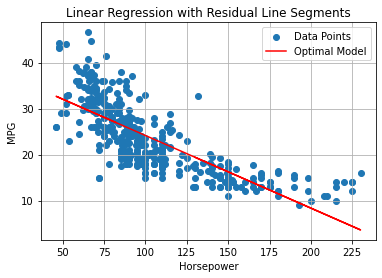

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Extract the "horsepower" and "mpg" variables
X = data.dropna()["horsepower"].values.reshape(-1, 1)
y = data.dropna()["mpg"].values

# Perform linear regression
reg = LinearRegression().fit(X, y)

y_pred = reg.predict(X)

# Calculate the residuals
residuals = y - y_pred

# Create a scatter plot of the data points
plt.scatter(X, y, label="Data Points")

# Plot the regression line in red
plt.plot(X, y_pred, color="red", label="Optimal Model")

plt.xlabel("Horsepower")
plt.ylabel("MPG")
plt.title("Linear Regression with Residual Line Segments")
plt.legend()
plt.grid(True)
plt.show()


Apart from the geometric interpretation, the coefficients of a linear regressor have an important **statistical interpretation**. In particular:

**The intercept $\beta_0$ is the value of $y$ that we get when the input value $x$ is equal to zero $x=0$ (i.e., $f(0)$)**. This value **may not always make sense**. For instance, in the example above, we have: $\beta_0 = 39.94$, which means that, **when the horsepower is $0$, then the consumption in mpg is equal to $39.94$**. 

**The coefficient $\beta_1$ indicates the steepness of the curve**. If $\beta_1$ is large, then the curve is steep. This indicates that a small change in $x$ is associates to a large change in $y$. In general, we can see that: 

$$f(x+1)-f(x)=\beta_0+\beta_1 (x+1)-\beta_0-\beta_1 x=\beta_1 (x+1-x)=\beta_1$$

which reveals that **when we observe an increment of one unit of x, we observe an increment of $\beta_1$ units in y**. In our example, $\beta_1=-0.15$, hence we can say that, for cars with one additional unit of horsepower, we observe an drop in mps $-0.15$ units.

### Accuracy of the Coefficient Estimates
Recall that we are trying to model the relationship between two random variables $X$ as $Y$ with a simple linear model:

$$Y = \beta_0 + \beta_1X+\epsilon$$

This means that, once we find appropriate values of $\beta_0$ and $\beta_1$, we expect these to summarize the **linear relationship in the population** or the **population regression line**. Also, recall that these values are obtained using two formulas which are based on realizations of $X$ of $Y$ and can be hence seen as **estimators**:

$$\hat \beta_1 = \frac{\sum_{i=1}^n(x_i - \overline x)(y_i - \overline y)}{\sum_{i=1}^n(x_i - \overline x)^2}$$
$$\hat \beta_0 = \overline y - \hat \beta_1 \overline x$$

We now recall that, being estimates, they provide values related to a given **realization of the random variables**.

Let us consider an ideal population for which:

$$Y=2x+1$$

Ideally, given a sample from the population, we expect to obtain $\hat \beta_0 \approx 1$ and $\hat \beta_1 \approx 2$. In practice, different samples may lead to different estimates and hence different regression lines, as shown in the plot below:

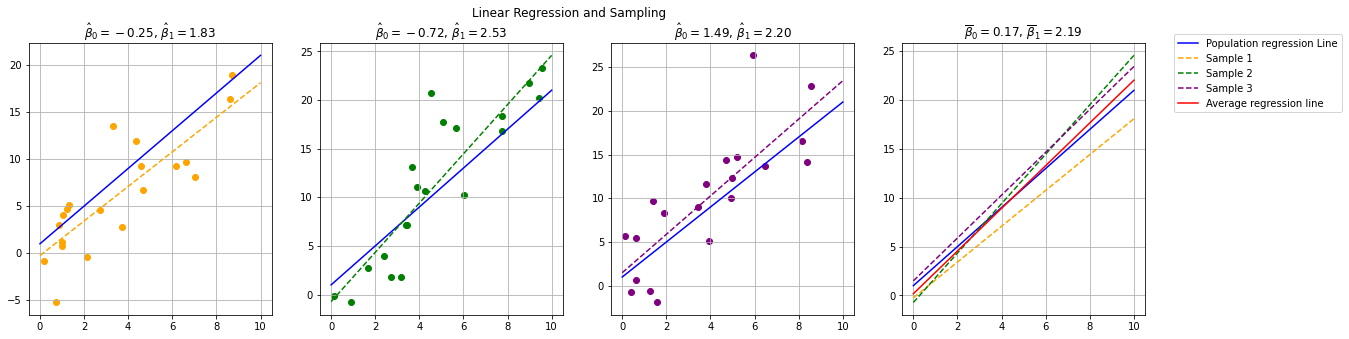

In [78]:
import matplotlib.pyplot as plt
import numpy as np

# True population parameters for the linear relationship
true_slope = 2.0
true_intercept = 1.0
sigma2 = 4

# Generate data points from the population
np.random.seed(42)
population_x = np.linspace(0, 10, 1000)
population_y = true_slope * population_x + true_intercept

# Create a figure with the population regression line
plt.figure(figsize=(20, 5))


# Simulate different random samples from the population
num_samples = 3
sample_size = 20

plt.suptitle("Linear Regression and Sampling")

colors = ['orange','green','purple','red','brown','pink','gray']

slopes = []
intercepts = []

for i in range(num_samples):
    plt.subplot(1,num_samples+1,i+1)
    plt.plot(population_x, population_y, label="Population Regression Line", color="blue")
    sample_x = np.random.choice(population_x, sample_size)
    sample_y = true_intercept + true_slope*sample_x + np.random.normal(0,sigma2,sample_size)
    
    # Fit a linear regression model to the sample
    slope, intercept = np.polyfit(sample_x, sample_y, 1)
    sample_regression_y = slope * population_x + intercept

    slopes.append(slope)
    intercepts.append(intercept)

    plt.title(f"$\\hat \\beta_0={intercept:.2f}$, $\\hat \\beta_1={slope:.2f}$")

    # Plot the regression line for the current sample
    plt.plot(population_x, sample_regression_y, linestyle='--', label=f"Sample {i + 1}", color=colors[i])
    plt.scatter(sample_x, sample_y, color=colors[i])
    plt.grid()


plt.subplot(1,num_samples+1,num_samples+1)
plt.plot(population_x, population_y, label="Population regression Line", color="blue")
for i in range(num_samples):
    sample_regression_y = slopes[i] * population_x + intercepts[i]

    # Plot the regression line for the current sample
    plt.plot(population_x, sample_regression_y, linestyle='--', label=f"Sample {i + 1}", color=colors[i])

avg_slope = np.mean(slopes)
avg_intercept = np.mean(intercepts)

sample_regression_y = avg_slope * population_x + avg_intercept
plt.plot(population_x, sample_regression_y, linestyle='-', label=f"Average regression line", color=colors[i+1])
plt.title(f"$\\overline\u007b\\beta\u007d_0={avg_intercept:.2f}$, $\\overline\u007b\\beta\u007d_1={avg_slope:.2f}$")
plt.grid()
plt.legend(bbox_to_anchor=(1.1, 1.05))


plt.show()


Each of the first three subplots shows a different sample drawn from the population, with its corresponding estimated regression line, along with the true population regression line. The last subplot compares the different estimated lines with the population regression line and the average regression line (in red). Coefficient estimates are shown in the subplot titles.

As can be noted, each estimate can be inaccurate, while the average regression line is very close to the population regression line. This is due to the fact that our estimators for the parameters of the regression coefficients **have non-zero variance**. In practice, in can be shown that these estimators are **unbiased** (hence the average regression line is close to the population line).

#### Standard Errors of the Regression Coefficients
A natural question is hence **"how do we assess how good our estimates of the regression coefficients are"**. We resort here to **statistical inference**. It can be shown that the squared standard errors associated to the coefficient estimates are:

$$SE(\hat \beta_0)^2 = \sigma^2 \left[\frac{1}{n} + \frac{\overline x^2}{\sum_{i=1}^{n}(x_i-\overline x)^2}\right], SE(\hat \beta_1)^2 = \frac{\sigma^2}{\sum_{i=1}^{n}(x_i-\overline x)^2}$$

Where:

$$\sigma^2 = Var(\epsilon)$$

Note that $\sigma^2$ is generally unknown, but it can be estimated as the **residual standard error**:

$$RSE = \sqrt{\frac{RSS}{n-2}}$$

In the formulas above, we see that:

* The standard errors are proportional to $\sigma^2$. This is expected, as we will have more uncertainty when the variance of the error term is high, hence when the points are more **scattered around the population regression line**.
* The standard errors depend inversely on $n\sigma_x^2 = \sum_{i=1}^n(x_i-\overline x)$ (the variance of $x$ multiplied by the sample size). This means that we will have more uncertainty in the estimates if $x$ concentrate in a narrow range.

#### Confidence Intervals of the Regression Coefficients
As we have seen, standard errors allow to compute confidence intervals. We will not see it into details, but it turns out that the true values will be in the following intervals with a $95\%$ confidence:

$$[\hat \beta_0 - 1.96 \cdot SE(\hat \beta_0), \hat \beta_0 + 1.96 \cdot SE(\hat \beta_0)]$$
$$[\hat \beta_1 - 1.96 \cdot SE(\hat \beta_1), \hat \beta_1 + 1.96 \cdot SE(\hat \beta_1)]$$

In practice, it is common to compute confidence intervals with a $95\%$ confidence. In the case of our model:

$$horsepower \approx = \beta_0 + mpg \cdot beta_1$$

We will have:

||COEFFICIENT|STD ERROR|CONFIDENCE INTERVAL|
|-|-|-|-|
|$\beta_0$|39.94|0.717|$[38.53, 41.35]$|
|$\beta_1$|-0.1578|0.006|$[-0.17, -0.15]$|



From the table above, we can say that:
* The value of `mpg` for `horsepower=0` lies somewhere between $38.53$ and $41.35$;
* An increase of `horsepower` by one unit is associated to an decrease of `mpg` between $-0.17$ and $.015$.

It is also common to see plots like the following one:

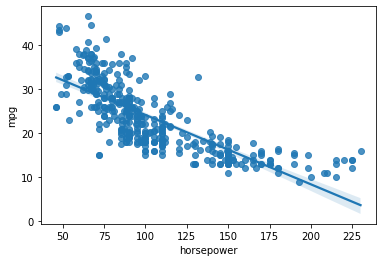

In [171]:
import seaborn as sns
sns.regplot(data=data, x='horsepower', y='mpg')
plt.show()

In the plot above, the shading around the line illustrates the variability induced by the confidence intervals estimated for the coefficients.

#### Statistical Tests for the Significance of Coefficients
Standard errors are also used to perform **hypothesis tests** on the coefficients. In practice, it is common to perform a statistical test to assess whether the coefficient $\beta_1$ is significantly different from zero. It is interesting to check this because, if $\beta_1$ was equal to zero, then there would not be any correlation between the variables (and hence the linear regressor would not be useful). Indeed, if $\beta-1=0$:

$$Y=\beta_0 + \epsilon$$

Hence $Y$ cannot be predicted from $X$ and the two variables are not associated. 

The **null hypothesis** of the test is as follows:

$$H_0: \text{There is no association between } X \text{ and } Y \Leftrightarrow \beta_1=0$$

While the **alternative hypothesis** is formulated as follows:

$$H_1: \text{There is some association between } X \text{ and } Y \Leftrightarrow \beta_1 \neq 0$$

To conduct the test, the following t-statistic is computed from the estimate of $\beta_1$ and the standard error:

$$t=\frac{\hat \beta_1 - 0}{SE(\hat \beta_1)}$$

Where the $-0$ term indicates that we are subtracting the value assumed by the null hypothesis ($\beta_1=0$). The statistic will follow a t-Student distribution with $n-2$ degrees of freedom ($n$ being the number of data points). If $n>30$ the distribution is approximately Gaussian. Using this statistic, a **$p-value$** indicating the **probability of observing a t statistic more extreme than this one if there is no associated between the two variables** is computed. Chosen a significance level $\alpha$ (often $\alpha=0.05$), we will reject the null hypothesis if $p<\alpha$. 

A similar test is conducted to check that $\beta_0$ is significantly different from zero.

Let's see the updated table from the same example:

||COEFFICIENT|STD ERROR|t|P>\|t\||CONFIDENCE INTERVAL|
|-|-|-|-|-|-|
|$\beta_0$|$39.94$|$0.717$|$55.66$|$0$|$[38.53, 41.35]$|
|$\beta_1$|$-0.1578$|$0.006$|$-24.49$|$0$|$[-0.17, -0.15]$|

From the table above, we can conclude that both $\beta_0$ and $\beta_1$ are significantly different than $0$ (p-value is equal to zero). This can also be noted by the fact that the confidence intervals do not contain the zero number. 

### Accuracy of the Model

The tests performed above will tell us if there is a relationship between the variables, but they will not tell us **how well does the model fit the data**. For instance, if the relationship between $X$ and $Y$ is not linear, we would expect the model not to fit the data very well. In practice, we can use different measures of accuracy of the model.

#### Residual Standard Error
One way to measure how well the model fits the data is to check the variance of the residuals $\epsilon$. Recall that our model is:

$$Y=\beta_0 + \beta_1 X + \epsilon$$

If the model fits the data well, then the values of $\epsilon$ will be close to zero and their variance will be small. We have already seen that the **Residual Sum of Squares (RSS)** is defined as:

$$RSE = \sqrt{\frac{RSS}{n-2}} = \sqrt{\frac{1}{n-2}\sum_{i=1}^n (y_i-\hat y_i)^2}$$

The residual standard error is a measure of the **lack of fit**. Large values will indicate that the model is not a good fit. For instance, in our example we have:

$$RSE = 4.91$$

This value has to be interpreted depending on the scale of the $Y$ variable. The average value of $Y$ is:

$$\overline{mpg} = 23.52$$

So the percentage error will be $4.91/23.52 \approx 20\%$.

#### $R^2$ Statistic
The RSE value is an absolute measure, which is measured in the units of $Y$. Indeed, to interpret it, we had to check the range of the $Y$ values. An alternative way to check if the model is fitting the data well, would be to compare the performance of our model with the performance of a **baseline model** which assumes no association between the $X$ and $Y$ variables. This model would be:

$$Y = k$$

This model has a single parameter $k$. The **Residual Sum of Squares** of this model would be:

$$RSS(k)=\sum_{i=1}^n{(k-y_i)^2}$$

To find the optimal value $k$, we can compute the derivative of the RSS and set it to zero:

$$\frac{\partial RSS(k)}{\partial k}=2\sum_{i=1}^n{(k-y_i)} = 2(nk - \sum_{i=1}^n y_i) = 2(nk - n\overline y)$$

$$2n(k - \overline y_i) = 0 \Leftrightarrow k=\overline y_i$$

Hence, the optimal estimator, **when there is not relationship between $X$ and $Y$ is the average value of $Y$**. We will call its RSS value the **total sum of squares**:

$$TSS = \sum_{i=1}^n(y_i-\overline y)^2$$

We can compare the RSS value obtained by our model to the TSS, which is the error of the baseline method:

$$\frac{RSS}{TSS}$$

This number will be **comprised between 0 and 1**, and in particular:
* $\frac{RSS}{TSS}=0$ when $RSS=0$, i.e., we have a perfect model;
* $\frac{RSS}{TSS}=1$ when $RSS=TSS$, i.e., we are not doing any better than the baseline model (so our model is poor).

Note that the RSS measures **the variability in $Y$ left unexplained after regression** (the one that the model could not capture), while the TSS measures **the total variability in $Y$**. The fraction hence explains the **proportion of variability which the model could not explain**.

We define the $R^2$ statistic as:

$$R^2 = 1 - \frac{RSS}{TSS}$$

Inverting by the $1-$ subtraction, this number measures the **proportion of variability in $Y$ that can be explained using $X$**

The plot below shows examples of linear regression fits with different $R^2$ values.

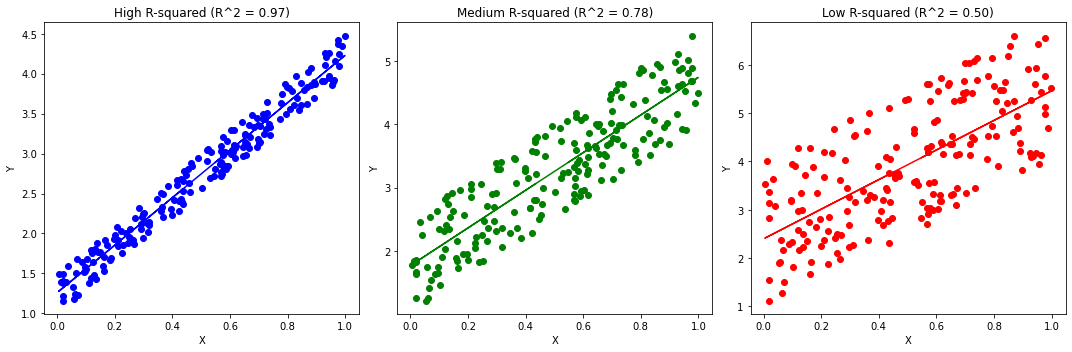

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Generate random data with varying R-squared values
np.random.seed(0)
x = np.random.rand(200, 1)
y1 = 3 * x + 1 + 0.5 * np.random.rand(200, 1) # High R-squared (close to 1)
y2 = 3 * x + 1 + 1.5*np.random.rand(200, 1)  # Medium R-squared
y3 = 3 * x + 1 + 3*np.random.rand(200, 1)  # Low R-squared (close to 0)

# Fit linear regression models and calculate R-squared values
reg1 = LinearRegression().fit(x, y1)
reg2 = LinearRegression().fit(x, y2)
reg3 = LinearRegression().fit(x, y3)

r2_1 = r2_score(y1, reg1.predict(x))
r2_2 = r2_score(y2, reg2.predict(x))
r2_3 = r2_score(y3, reg3.predict(x))

# Create subplots for each dataset
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot the first dataset
axes[0].scatter(x, y1, label=f'R^2 = {r2_1:.2f}', c='blue')
axes[0].plot(x, reg1.predict(x), color='blue')
axes[0].set_title(f"High R-squared (R^2 = {r2_1:.2f})")
axes[0].set_xlabel('X')
axes[0].set_ylabel('Y')

# Plot the second dataset
axes[1].scatter(x, y2, label=f'R^2 = {r2_2:.2f}', c='green')
axes[1].plot(x, reg2.predict(x), color='green')
axes[1].set_title(f"Medium R-squared (R^2 = {r2_2:.2f})")
axes[1].set_xlabel('X')
axes[1].set_ylabel('Y')

# Plot the third dataset
axes[2].scatter(x, y3, label=f'R^2 = {r2_3:.2f}', c='red')
axes[2].plot(x, reg3.predict(x), color='red')
axes[2].set_title(f"Low R-squared (R^2 = {r2_3:.2f})")
axes[2].set_xlabel('X')
axes[2].set_ylabel('Y')

plt.tight_layout()
plt.show()


The interpretation of the $R^2$ is related to the one of the Pearson's $\rho$ correlation coefficient. Indeed, both scores are independent of the slope of the regression line, but quantify how liner the relationship between $X$ and $Y$ is. In practice, it can be shown that:

$$R^2 = \rho^2$$

The $R^2$ value in our example of regressing `mpg` from `horsepower` is:

$$R^2 = 0.61$$

Which indicates that $61\%$ of the variance of the $Y$ variable is explained by the model.

## Multiple Linear Regression

In the example above, we have seen that about $61\%$ of the variance in $Y$ was explained by the model. One may wonder why about $39\%$ of the variance could not be explained. Some common reasons may be:
* There is stochasticity in the data which prevents us to learn an accurate function to predict $Y$ from $X$;
* The relationship between $X$ and $Y$ is far from linear, so we cannot predict $Y$ accurately;
* The prediction of $Y$ also depends on other variables.

While in general the unexplained variance is due to a combination of the aforementioned factors, the third one is often very common and relatively easy to fix. In our case, we are trying to predict `mpg` from `horsepower`. However, we can easily imagine how other variables may contribute to the estimation of `mpg`. For instance, two cars with the same `horsepower` but different `weight` may have different values of `mpg`. We can hence try to find a model with **also uses `weight` to predict `mpg`**. This is simply done by adding an additional coefficient for the new variable:

$$mpg = \beta_0 + \beta_1 horsepower + \beta_2 weight$$

The obtained model is called **multiple linear regression**. If we fit this model (we will see how to estimate coefficients in this case), we obtain the following $R^2$ value:

$$R^2=0.71$$

An increment of $+0.1$!

In general, we can include as many variables as we think is relevant to add and define the following model:

$$Y = \beta_0 + \beta_1 X_1 + \ldots + \beta_n X_n$$

For instance, the following model:

$$mpg = \beta_0 + \beta_1 horsepower + \beta_2 weight + \beta_3 model\_year$$

Has an $R^2$ value of:

$$R^2=0.808$$

### Geometrical Interpretation

The multiple regression model based on two variable has a geometrical interpretation. Indeed, the equation:

$$Z = \beta_0 + \beta_1 X + \beta_2 Y$$

identifies a plane in the 3D space. We can visualize the plane identified by the $mpg = \beta_0 + \beta_1 horsepower + \beta_2 weight$ model as follows:

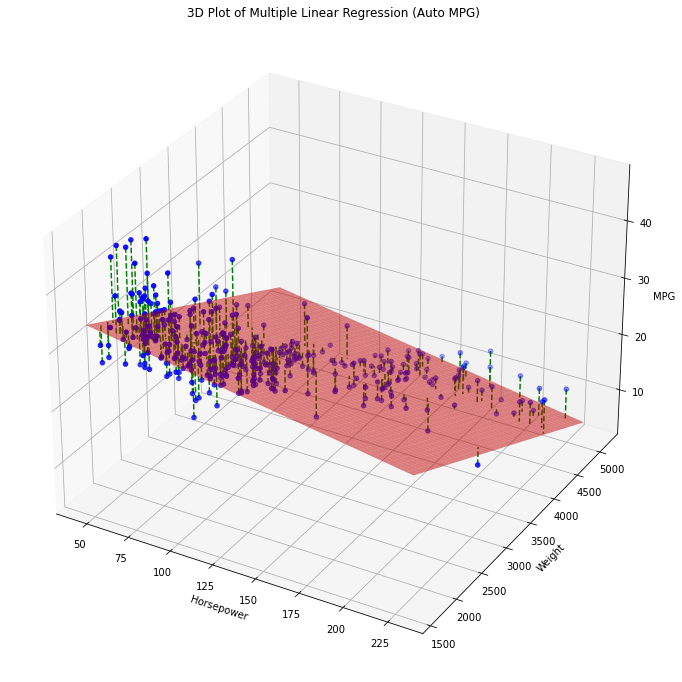

In [200]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Load the Auto MPG dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
column_names = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model_year", "origin", "car_name"]
auto_df = pd.read_csv(url, delim_whitespace=True, names=column_names)

# Clean the dataset by removing missing values
auto_df = auto_df[auto_df.horsepower != '?']
auto_df['horsepower'] = auto_df['horsepower'].astype(float)

# Select relevant columns for the analysis
X = auto_df[["horsepower", "weight"]].values
y = auto_df["mpg"].values

# Standardize the features
scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)
X_scaled = X

# Fit a linear regression model
reg = LinearRegression()
reg.fit(X_scaled, y)

# Create a grid for the plot
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 50), np.linspace(y_min, y_max, 50))

# Predict the response variable (mpg)
zz = reg.predict(np.c_[xx.ravel(), yy.ravel()])
zz = zz.reshape(xx.shape)

# Create a 3D scatter plot of data points
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_scaled[:, 0], X_scaled[:, 1], y, c='b', marker='o', label='Data Points')

# Plot the regression plane
ax.plot_surface(xx, yy, zz, color='r', alpha=0.5, label='Regression Plane')

# Calculate and add residuals for every data point
predicted_mpg = reg.predict(X_scaled)
for i in range(len(X_scaled)):
    x = [X_scaled[i, 0], X_scaled[i, 0]]
    yy = [X_scaled[i, 1], X_scaled[i, 1]]
    z = [y[i], predicted_mpg[i]]
    ax.plot(x,yy,z, linestyle='--', color='g')

ax.set_xlabel('Horsepower')
ax.set_ylabel('Weight')
ax.set_zlabel('MPG')
ax.set_title('3D Plot of Multiple Linear Regression (Auto MPG)')
#plt.legend()
plt.show()


The dashed lines indicate the residuals. The best fit of the model minimizes again the sum of squared residuals. This model makes predictions selecting the $Z$ value which intersect the plane for given values of $X$ and $Y$.

In general, when we consider $n$ variables, the linear regressor will be **a (n-1)-dimensional hyperplane in the n-dimensional space**.

### Statistical Interpretation
The statistical interpretation of a multiple linear regression model is very similar to the interpretation of a simple linear regression model. Given the general model:

$$y=\beta_0 + \beta_1 x_1 + \ldots + \beta_i x_i + \ldots + \beta_n x_n$$

we can interpret the coefficients as follows:

* The value of $\beta_0$ indicates the value of $y$ when all independent variables are set to zero;
* The value of $\beta_i$ indicates the increment of $y$ that we expect to see when $x_i$ increments by one unit, **provided that all other values $x_j | j\neq i$ are constant**.

In the considered example:

$$mpg = \beta_0 + \beta_1 horsepower + \beta_2 weight$$

we obtain the following estimates for the coefficients:

|$\hat \beta_0$|$\hat \beta_1$|$\hat \beta_2$|
|-|-|-|
|$45.64$|$-0.05$|$-0.01$|

We can interpret these estimates as follows:
* Cars with zero `horsepower` and zero `weight` will have an `mpg` of $45.64$ ($\approx 19.4 Km/l$).
* An increment of one unit of `horsepower` is associated to a decrement of `mpg` of $-0.05$ units, provided that `weight` is constant. This makes sense: cars with more `horsepower` will probably consume more fuel.
* An increment of one unit of `weight` is associated to a decrement of `mpg` of `-0.01` units, provided that `horsepower` is constant. This makes sense: heavier cars will consume more fuel.

Let's compare the estimates above with the estimates of our previous model:

$$mpg = \beta_0 + \beta_1 horsepower$$

In that case, we obtained:

|$\hat \beta_0$|$\hat \beta_1$|
|-|-|
|$39.94$|$-0.16$|

We can note that the coefficients are different. This happens because, when we add more variables, **the model explains variance in a different way**. If we think more about it, this is coherent with the interpretation of the coefficients. Indeed:

* $39.94$ is the expected value of `mpg` when `horsepower=0`, but all other variables have unknown values. $45.64$ is the expected value of `mpg` when `horsepower=0` and `weight=0`. This is different, as in the second case we are (virtually) looking at a subset of data for which both horsepower and weight are zero, while in the first case, we are only looking at data for which `horsepower=0`, but `weight` can be any value. In some sense, we can see $39.94$ as an average value for different values of `weight` (and all other unobserved variables).
* $-0.16$ is the expected increment of `mpg` when we observe an increment of one unit of `horsepower` and we don't know anything about the values of the other variables. $-0.05$ is the expected increment of `mpg` when `horsepower` and `weight` are held constant, so, again, we are (virtually) looking at a different subset of the data in which the relationship between `mpg` and `horsepower` may be a bit different.

Note that, also in the case of multiple regression, we can estimate confidence intervals and perform statistical tests. In our example, we will get this table:

||COEFFICIENT|STD ERROR|t|P>\|t\||CONFIDENCE INTERVAL|
|-|-|-|-|-|-|
|$\beta_0$|$45.64$|$0.793$|$57.54$|$0$|$[44.08, 47.20]$|
|$\beta_1$|$-0.05$|$0.011$|$-4.26$|$0$|$[-0.07, -0.03]$|
|$\beta_2$|$-0.01$|$0.001$|$-11.53$|$0$|$[-0.007, -0.005]$|

### Estimating the Regression Coefficients
Given the general model:

$$y=\beta_0 + \beta_1 x_1 + \ldots + \beta_i x_i + \ldots + \beta_n x_n$$

We can define our **cost function** again as the residual sum of squares:

$$RSS(\beta_0,\ldots,\beta_n) = \sum_{i=1}^m (y_i - \beta_0+\beta_1x_1^{(i)} + \ldots + \beta_n x_n^{(i)})^2$$

Where $m$ is the total number of observations and $x_j^{(i)}$ is the $j^{th}$ variable ($x_j$) of the $i^{th}$ observations.

The values $\hat \beta_0,\ldots,\hat \beta_n$ values that minimize the loss function above are the **multiple least square coefficient estimates**.

To find these optimal values, it is convenient to use matrix notation. Given $m$ observations, we will have $m$ equations:

$$y^{(1)} = \beta_0 + \beta_1 x_1^{(1)} + \ldots + \beta_n x_n^{(1)} + e^{(1)}$$
$$y^{(2)} = \beta_0 + \beta_1 x_1^{(2)} + \ldots + \beta_n x_n^{(2)} + e^{(2)}$$
$$\ldots$$
$$y^{(m)} = \beta_0 + \beta_1 x_1^{(m)} + \ldots + \beta_n x_n^{(m)} + e^{(m)}$$

We can write the $m$ equations in matrix form as follows:

$$\mathbf{y} = \mathbf{X} \mathbf{\beta} + \mathbf{e}$$

where:

$$\mathbf{y} = \begin{bmatrix}
y^{(1)} \\
y^{(2)} \\
\vdots \\
y^{(m)}
\end{bmatrix},
\mathbf{X}=
\begin{bmatrix}
1 & x_1^{(1)} & x_2^{(1)} & \ldots & x_n^{(1)} \\
1 & x_1^{(2)} & x_2^{(2)} & \ldots &  x_n^{(2)} \\
\vdots & \vdots & \vdots \\
1 & x_1^{(m)} & x_2^{(m)} & \ldots &  x_n^{(m)} \\
\end{bmatrix},
\mathbf{\beta} = \begin{bmatrix}
\beta_{0} \\
\beta_{1} \\
\vdots \\
\beta_{n}
\end{bmatrix},
\mathbf{e} = \begin{bmatrix}
e^{(1)} \\
e^{(2)} \\
\vdots \\
e^{(m)}
\end{bmatrix}
$$

The matrix $\mathbf{X}$ is called the **design matrix**.

In the notation above, we want to minimize:

$$RSS(\mathbf{\beta}) = \sum_{i=1}^m (e^{(i)})^2 = \mathbf{e}^T \mathbf{e}$$

It can be shown that, by the **least squares method**, the RSS is minimized by the estimate:

$$\mathbf{\hat \beta} = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}$$

### The F-Test
When fitting a multiple linear regressor, it is common to perform a statistical test to check whether at least one of the regression coefficients is significantly different from zero (in the population). This test is called an $F-test$. We define the **null and alternative hypotheses** as follows:

$$H_0: \beta_1=\beta_2=\ldots=\beta_n=0$$

$$H_a: \exists j\ s.t.\ \beta_j \neq 0$$

The null hypothesis (the one we want to reject with this test) is that all coefficients are zero in the population. If this is true, than the multiple regressor is not reliable and we should discard it. The alternative hypothesis is that at least one of the coefficients is different from zero.

The test is performed by computing the following F-statistic:

$$F=\frac{(TSS-RSS)/n}{RSS(m-n-1)}$$

Where recall that $n$ is the number of variables and $m$ is the number of observations.

In practice, the F-statistic will be:

* Close to $1$ if there is no relationship between the response and the predictors ($H_0$ is true);
* Greater than $1$ if $H_a$ is true.

The test is carried out as usual, finding a p-value which indicates the probability to observe a statistic larger than the observed one if all regression coefficients are zero in the population.

In our example of regressing `mpg` from `horsepower` and `weight`, we will find:

|$R^2$|F-statistic|Prob(F-statistic)|
|-|-|-|
|0.706|467.9|3.06e-104|

This indicates that the regressor is statistically relevant. The $F-statistic$ is much larger than $1$ and the p-value (Prob(F-statistic)) is very small (under the significance level $\alpha = 0.05$).

### Variable Selection
Let's now try to fit a multiple linear regressor on our dataset by including all variables. Our dependent variable will be `mpg`, while the set of dependent variables will be:

In [226]:
print(data.columns[:-1].values)

['displacement' 'cylinders' 'horsepower' 'weight' 'acceleration'
 'model_year' 'origin']


We obtain the following measures of fit:

|$R^2$|F-statistic|Prob(F-statistic)|
|-|-|-|
|0.821|252.4|2.04e-139|

The regressor has a good $R^2$ and the p-value of the F-test is very small. We can conclude that there is some relationship between the independent variables and the dependent one.

The estimates of the regression coefficients will be:

In [229]:
ols("mpg ~ horsepower + weight + displacement + cylinders + acceleration + model_year + origin", data).fit().summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-17.2184,4.644,-3.707,0.000,-26.350,-8.087
horsepower,-0.0170,0.014,-1.230,0.220,-0.044,0.010
weight,-0.0065,0.001,-9.929,0.000,-0.008,-0.005
displacement,0.0199,0.008,2.647,0.008,0.005,0.035
cylinders,-0.4934,0.323,-1.526,0.128,-1.129,0.142
acceleration,0.0806,0.099,0.815,0.415,-0.114,0.275
model_year,0.7508,0.051,14.729,0.000,0.651,0.851
origin,1.4261,0.278,5.127,0.000,0.879,1.973


From the table, we can see that not all predictors have a p-value below the significance level $\alpha=0.05$. In particular:

* `horsepower` has a large p-value of $0.22$;
* `cylinders` has a large p-value of $0.128$;
* `acceleration` has a large p-value of $0.415$.

This means that, within the current regressor, there is no meaningful relationship between these variables and `mpg`. A legitimate question is

> How is it possible that `horsepower` is not associated to `mpg` in this regressor if it was associated to it before?!

However, we should recall that, when we consider a different set of variables, the interpretation of the coefficients changes. So, even if in the previous models, `horsepower` was correlated to `mpg`, now it is not correlated anymore. We can imagine that the relationship between these variables is now explained by the other variables which we have introduced.

Even if the model is statistically significant, it does make sense to get rid of the variables with poor relationships with `mpg`. After all, if we remove a variable, the estimates of the other coefficients may change. 

A common way to remove these variables is by **backward selection** or **backward elimination**. This consists in iteratively removing the variable with the largest p-value. We remove one variable at a time and re-compute the results, iterating until all variables have a small p-value.

let's start by removing `acceleration`. This is the result:

In [231]:
ols("mpg ~ horsepower + weight + displacement + cylinders + model_year + origin", data).fit().summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-15.5635,4.175,-3.728,0.000,-23.773,-7.354
horsepower,-0.0239,0.011,-2.205,0.028,-0.045,-0.003
weight,-0.0062,0.001,-10.883,0.000,-0.007,-0.005
displacement,0.0193,0.007,2.579,0.010,0.005,0.034
cylinders,-0.5067,0.323,-1.570,0.117,-1.141,0.128
model_year,0.7475,0.051,14.717,0.000,0.648,0.847
origin,1.4282,0.278,5.138,0.000,0.882,1.975


Note that the coefficients have changed. We now remove `cylinders`, which has the largest p-value of $0.117$:

In [233]:
ols("mpg ~ horsepower + weight + displacement  + model_year + origin", data).fit().summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-16.6939,4.120,-4.051,0.000,-24.795,-8.592
horsepower,-0.0219,0.011,-2.033,0.043,-0.043,-0.001
weight,-0.0063,0.001,-11.124,0.000,-0.007,-0.005
displacement,0.0114,0.006,2.054,0.041,0.000,0.022
model_year,0.7484,0.051,14.707,0.000,0.648,0.848
origin,1.3853,0.277,4.998,0.000,0.840,1.930


All variables now have an acceptable p-value ($\alpha=0.05$). We are done. Note that, by removing the two variables, `horsepower` now has an acceptable p-value. This indicates that one of the removed variables was redundant with respect to `horsepower`.

### Adjusted $R^2$

While in the case of simple regression we saw that $R^2=\rho(x,y)^2$ (where $\rho$ is the correlation coefficient), in the case of multiple regression, it turns out that:

$$R^2 = \rho(Y, \hat Y)^2$$

In general, having more variables in the linear regressor will reduce the error term and improve the covariance between $Y$ and $\hat Y$, hence increasing the $R^2$. However, in general having a small increase in $R^2$ when we add a new variable may not be good. Indeed, we could prefer a simpler model with a slightly smaller $R^2$ value.

To express this, we can compute the adjusted $R^2$ as follows:

$$\overline R^2 = 1- \frac{m-1}{m-n-1} (1-R)^2$$

Where $m$ is the number of data points and $n$ is the number of independent variables. The $\overline R^2$ re-balances the $R^2$ accounting for the introduction of additional variables.

For instance the last model we fit has an $R^2=0.820$ and $\overline R^2=0.818$. We will see more in details how to use the $\overline R^2$ in the laboratory.

## Qualitative Predictors
So far, we have studied relationships between continuous variables. In practice, linear regression allows to also study relationship between **continuous dependent variables** and **qualitative independent variables**. We will consider another dataset similar to the **Auto MPG** dataset:


In [355]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
automobile = fetch_ucirepo(id=10) 
  
# data (as pandas dataframes) 
X = automobile.data.features 
y = automobile.data.targets 

auto = X.join(y)[['city-mpg','horsepower','fuel-system','fuel-type','length','num-of-cylinders']].rename(
    columns={'city-mpg':'mpg',
     'fuel-system':'fuelsystem',
     'fuel-type':'fueltype',
     'num-of-cylinders':'cylinders'}
)
auto

,mpg,horsepower,fuelsystem,fueltype,length,cylinders
0,21,111.0,mpfi,gas,168.8,4
1,21,111.0,mpfi,gas,168.8,4
2,19,154.0,mpfi,gas,171.2,6
3,24,102.0,mpfi,gas,176.6,4
4,18,115.0,mpfi,gas,176.6,5
...,...,...,...,...,...,...
200,23,114.0,mpfi,gas,188.8,4
201,19,160.0,mpfi,gas,188.8,4
202,18,134.0,mpfi,gas,188.8,6
203,26,106.0,idi,diesel,188.8,6


In this case, besides having numerical variables, we also have qualitative ones such as `fuelsystem` and `fueltype`. Let's see what are their unique values:

In [358]:
print("fuelsystem:", auto['fuelsystem'].unique())
print("fueltype:", auto['fueltype'].unique())

Fuel System: ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']
Fuel Type: ['gas' 'diesel']


We will not see the meaning of all the values of `fuelsystem`, while the values of `fueltype` are self-explanatory.

### Predictors with Only Two Levels

We will first see the case in which qualitative predictors only have two levels. To handle these as independent variables, we can define a new **dummy variable** which will encode $1$ as one of the two levels and $0$ as the other one. For instance, we can introduce a `fueltype[T.gas]` variable defined as follows:

$$fueltype[T.gas] = \begin{cases} 1 & \text{if } fueltype=gas \\ 0 & \text{otherwise}\end{cases}$$

If we fit the model:

$$mpg = \beta_0 + \beta_1 horsepower + \beta_2 fueltype[T.gas]$$

We obtain an $R^2=0.661$ with $Prob(F-statistic) \approx 0$ and the following estimates for the regression parameters:

In [365]:
ols("mpg ~ horsepower + fueltype", auto).fit().summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,41.2379,1.039,39.705,0.000,39.190,43.286
fueltype[T.gas],-2.7658,0.918,-3.013,0.003,-4.576,-0.956
horsepower,-0.1295,0.007,-18.758,0.000,-0.143,-0.116


How do we interpret this result?

* The value of `mpg` when `horsepower=0` `fueltype=diesel` (i.e., `fueltype[T.gas]=0`) is $41.2379$;
* An increase of one unit of `horsepower` is associated to a decrease of $0.1295$ units of `mpg` provided that `fueltype=diesel`;
* For gas vehicles we expect to see a decrease of `mpg` equal to $2.7658$ with respect to diesel vehicles.

### Predictors with More than Two Levels

When predictors have $n$ levels, we need to introduce **multiple dummy variables**. Specifically, we need to introduce $n-1$ binary variables. For instance, if the levels of the variable `income` are `low`, `medium` and `high`, we could introduce two variables `income[T.low]` and `income[T.medium]`. These are sufficient to express all possible values of `income` as shown in the table below:

|`income`|`income[T.low]`|`income[T.medium]`|
|-|-|-|
|`low`|1|0|
|`medium`|0|1|
|`high`|0|0|

Note that we could have introduced a new variable `income[T.high]` but this would have been redundant and so **correlated to the other two variables**, which is something we know we have to avoid in linear regression.

If we fit the model which predicts `mpg` from `horsepower` and `fuelsystem` we obtain $R^2=0.734$, $Prob(F-statistic) \approx 0$ and the following estimates for the regression coefficients:

In [369]:
ols("mpg ~ horsepower + fuelsystem", auto).fit().summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,38.8638,1.234,31.504,0.000,36.431,41.297
fuelsystem[T.2bbl],-1.6374,1.127,-1.453,0.148,-3.860,0.585
fuelsystem[T.4bbl],-12.0875,2.263,-5.341,0.000,-16.551,-7.624
fuelsystem[T.idi],-0.3894,1.300,-0.299,0.765,-2.954,2.175
fuelsystem[T.mfi],-5.8285,3.661,-1.592,0.113,-13.049,1.392
fuelsystem[T.mpfi],-5.4942,1.202,-4.570,0.000,-7.865,-3.123
fuelsystem[T.spdi],-5.2446,1.612,-3.254,0.001,-8.423,-2.066
fuelsystem[T.spfi],-6.1522,3.615,-1.702,0.090,-13.282,0.978
horsepower,-0.0968,0.009,-11.248,0.000,-0.114,-0.080


As we can see, we have added different correlation coefficients in order to deal with the different levels. Not all predictors have a low p-value, so we can remove those with backward elimination. We will see some more examples in the laboratory.

## Extensions of the Linear Model
The linear model makes the very restrictive assumption that the the nature of the relationship between the variables is linear. However, in many cases, it is common to find relationships which deviate from this assumption. In the following sections, we will see some simple ways to deviate from these assumption within a linear regression model.

### Interaction Terms
A linear regression model assumes that **the effect of the different independent variables to the prediction of the dependent variable is additive**:

$$y = \beta_0 + \beta_1 x_1 + \ldots + \beta_n x_n + \epsilon$$

In some cases, however, it makes sense to assume the presence of **interaction terms**, i.e., terms in the model which account for the interactions between some variables. For instance:

$$y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_1x_2$$

As a concrete example, consider the problem of regressing `mpg` from `horsepower` and `weight`. A simple model of the kind:

$$mpg = \beta_0 + \beta_1 horsepower + \beta_2 weight$$

assumes that the $\beta_1$, the increment that we observe in `mpg` when `horsepower` increments by one unit is **constant even when other variables change their values**. However, we can imagine how, for light vehicles `horsepower` affects `mpg` in a way, while for heavy vehicles `horsepower` affects `mpg` in a different way. For example, we expect light vehicles with big `horsepower` to be more efficient than heavy vehicles with small `horsepower`. To account for this, we could consider the following model instead:

$$mpg = \beta_0 + \beta_1 horsepower + \beta_2 weight + \beta_3 horsepower \times weight$$

Note that the model above is nonlinear in $horsepower$ and $weight$, but it is still linear if we introduce a variable $hw = horsepower \times weight$. We can easily do this by adding a new column to our design matrix computed as the product of the two variables. Then we can fit the model using the same exact estimators seen before.

This new regressor obtained $R^2=0.748$, which is larger as compared to $R^2=0.706$ obtained for the $mpg = \beta_0 + \beta_1 horsepower + \beta_2 weight$ regressor. Both regressors have a large F-statistic and an associated p-value close to zero. The new regressor explains more variance than the previous one.

The estimated coefficients are:

In [68]:
ols("mpg ~ horsepower + horsepower*weight + weight", data).fit().summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,63.5579,2.343,27.127,0.000,58.951,68.164
horsepower,-0.2508,0.027,-9.195,0.000,-0.304,-0.197
weight,-0.0108,0.001,-13.921,0.000,-0.012,-0.009
horsepower:weight,5.355e-05,6.65e-06,8.054,0.000,4.05e-05,6.66e-05


Let's compare these with the ones obtained for the $mpg = \beta_0 + \beta_1 horsepower + \beta_2 weight$ regressor:

In [74]:
ols("mpg ~ horsepower + weight", data).fit().summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,45.6402,0.793,57.540,0.000,44.081,47.200
horsepower,-0.0473,0.011,-4.267,0.000,-0.069,-0.026
weight,-0.0058,0.001,-11.535,0.000,-0.007,-0.005


We can note that:
* The p-value of the product $horsepower \times weight$ is almost zero. This is a strong evidence that the true relationship is not merely additive, but an interaction between the two variables actually happens.
* The coefficients of `horsepower` and `weight` have changed. This makes sense, also their interpretation has changed. For instance, in the new regressor an increase of one unit of `horsepower` is associated to a decrease of $0.2508$ units of `mpg` if **the product between `horsepower` and `weight` does not change**, i.e., if the way the two quantities interact does not change.

How should we interpret the coefficient $\beta_3$? Let's rewrite our model:

$$mpg = \beta_0 + \beta_1 horsepower + \beta_2 weight + \beta_3 horsepower \times weight$$

as follows:

$$mpg = \beta_0 + horsepower (\beta_1 + \beta_3 weight) + \beta_2 weight $$

Hence we can see $\beta_3$ as the increase in the coefficient of `horsepower` when `weight` increases by one unit. In the example above $\beta_3$ is very small, this is due to the fact that weight is measured in pounds, so increasing the weight by one pound has a very small effect. It easy to see that, **an increase in `weight` by $1000$ pounds increases the coefficient of $horsepower$ by $1000 \beta_3 \approx = 0.05$**. This is a relevant increase, considering that the coefficient of $horsepower$ is $-0.2508$. Hence, when we see an increase in `weight` of $1000$ units, the coefficient of `horsepower` will be larger, meaning that **in heavier cars, large `horsepower` will let `mpg` decrease more gently**.

Let us consider the computed coefficients again:

In [ ]:
ols("mpg ~ horsepower + horsepower*weight + weight", data).fit().summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,63.5579,2.343,27.127,0.000,58.951,68.164
horsepower,-0.2508,0.027,-9.195,0.000,-0.304,-0.197
weight,-0.0108,0.001,-13.921,0.000,-0.012,-0.009
horsepower:weight,5.355e-05,6.65e-06,8.054,0.000,4.05e-05,6.66e-05


We can interpret the results as follows:
* **Intercept**: the value of `mpg` is $63.5579$ when `horsepower=0` and `weight=0` (also their product will be zero);
* **horsepower**: an increase of one unit corresponds to a decrement of $-0.2508$ in `mpg` provided that `weight` is held constant and the way `weight` influences `horsepower` does not change. Note that, if we change the value of `horsepower` and keep `weight` constant, the interaction term will change. Here we assume that, even if the ratio change, we assume that the way `weight` affects `horsepower` does not change.
* **weight**: an increase of one unit corresponds to a decrement of $-0.0108$ in `mpg` provided that `horsepower` is held constant and the way `horsepower` affects `weight` does not change.
* **horsepower:weight**: an increase in one unit of `weight` increases the coefficient regulating the effect of `horsepower` on `mpg` by $5.05e-5$.

### Non-linear Relationships: Quadratic and Polynomial Regression
In many cases, the relationship between two variables is not linear. Let's visualize the scatterplot between $X$ and $Y$:

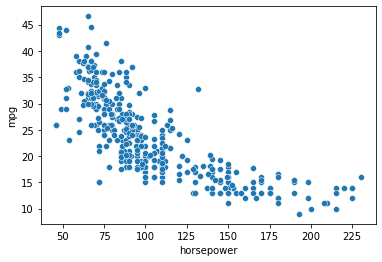

In [506]:
sns.scatterplot(x='horsepower',y='mpg',data=data)
plt.show()

This relationship does not look linear. It looks instead as a quadratic, which would be fit by the following model:

$$mpg = \beta_0 + \beta_1 horsepower + \beta_2 horsepower^2$$

Again, the model above is nonlinear in `horsepower`, but we can still fit it with a linear regressor if we add a new variable $z=horsepower$. 

The fit model will obtain $R^2=0.688$, larger than $R^2=608$ obtained by the base model ($mpg = \beta_0 + \beta_1 horsepower$). Both have a large F-statistic.

The estimated coefficients are:

In [520]:
ols("mpg ~ horsepower + I(horsepower**2)", data).fit().summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,56.9001,1.800,31.604,0.000,53.360,60.440
horsepower,-0.4662,0.031,-14.978,0.000,-0.527,-0.405
I(horsepower ** 2),0.0012,0.000,10.080,0.000,0.001,0.001


The coefficients now describe the quadratic:

$$y = 58.9001 - 0.4662 x + 0.0012 x^2$$

If we plot it on the data, we obtain the following:

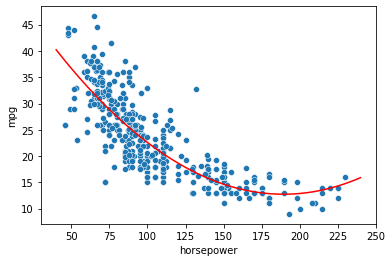

In [521]:
model=ols("mpg ~ horsepower + I(horsepower**2)", data).fit()
b0, b1, b2 = model.params.values
sns.scatterplot(x='horsepower',y='mpg',data=data)
x = np.linspace(40,240,200)
y = b0+b1*x+b2*x**2
plt.plot(x,y,'r')
plt.show()

In general, we can fit a polynomial model to the data, choosing a suitable degree $d$. For instance, for $d=4$ we have:

$$mpg = \beta_0 + \beta_1 horsepower + \beta_2 horsepower^2 + \beta_3 horsepower^3 + \beta_4 horsepower^4$$

which identifies the following fit:

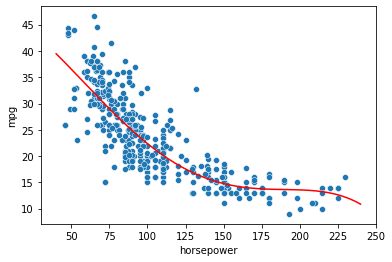

In [525]:
model=ols("mpg ~ horsepower + I(horsepower**2) + I(horsepower**3) + I(horsepower**4)", data).fit()
b0, b1, b2, b3,b4 = model.params.values
sns.scatterplot(x='horsepower',y='mpg',data=data)
x = np.linspace(40,240,200)
y = b0+b1*x+b2*x**2+b3*x**3+b4*x**4
plt.plot(x,y,'r')
plt.show()

This approach is known as **polynomial regression** and allows to turn the linear regression into a nonlinear model. Note that, when we have more variables, polynomial regression also includes interaction terms. For instance, the linear model:

$$y = \beta_0 + \beta_1x + \beta_2y$$

becomes the following polynomial model of degree $2$:

$$y = \beta_0 + \beta_1x + \beta_2y + \beta_3x^2 + \beta_4y^2 + \beta_5 xy$$

As usual, we only have to add new variables for the squared and interaction term and solve the problem as a linear regression one. This is easily handled by libraries. Note that, as the number of variables increases, the number of terms to add for a given degree also increases.

## Residual Plots and Residual Q-Q Plots
Residual plots are a way to diagnose if the linear model we are fitting on the data actually describes the relationship between the variables. For instance, if the relationship is not linear, and we try to force a linear model, the model will not be accurate.

If the relation is accurate, we expect the residuals of the model (i.e., the $e_i=\hat y_i - y_i$ terms) to be random and approximately Gaussian. 

**To check if the residuals are random, it is common to show a residual plot**, which plots the residuals on the $y$ axis and the true $y$ values on the y axis. We expect to observe a cloud of points centered around the zero  with no specific patters. 

**To check if the residuals are Gaussian, we can show Q-Q plots**

The graph below compares residual plots and Q-Q Plots of the residuals of different regression models:

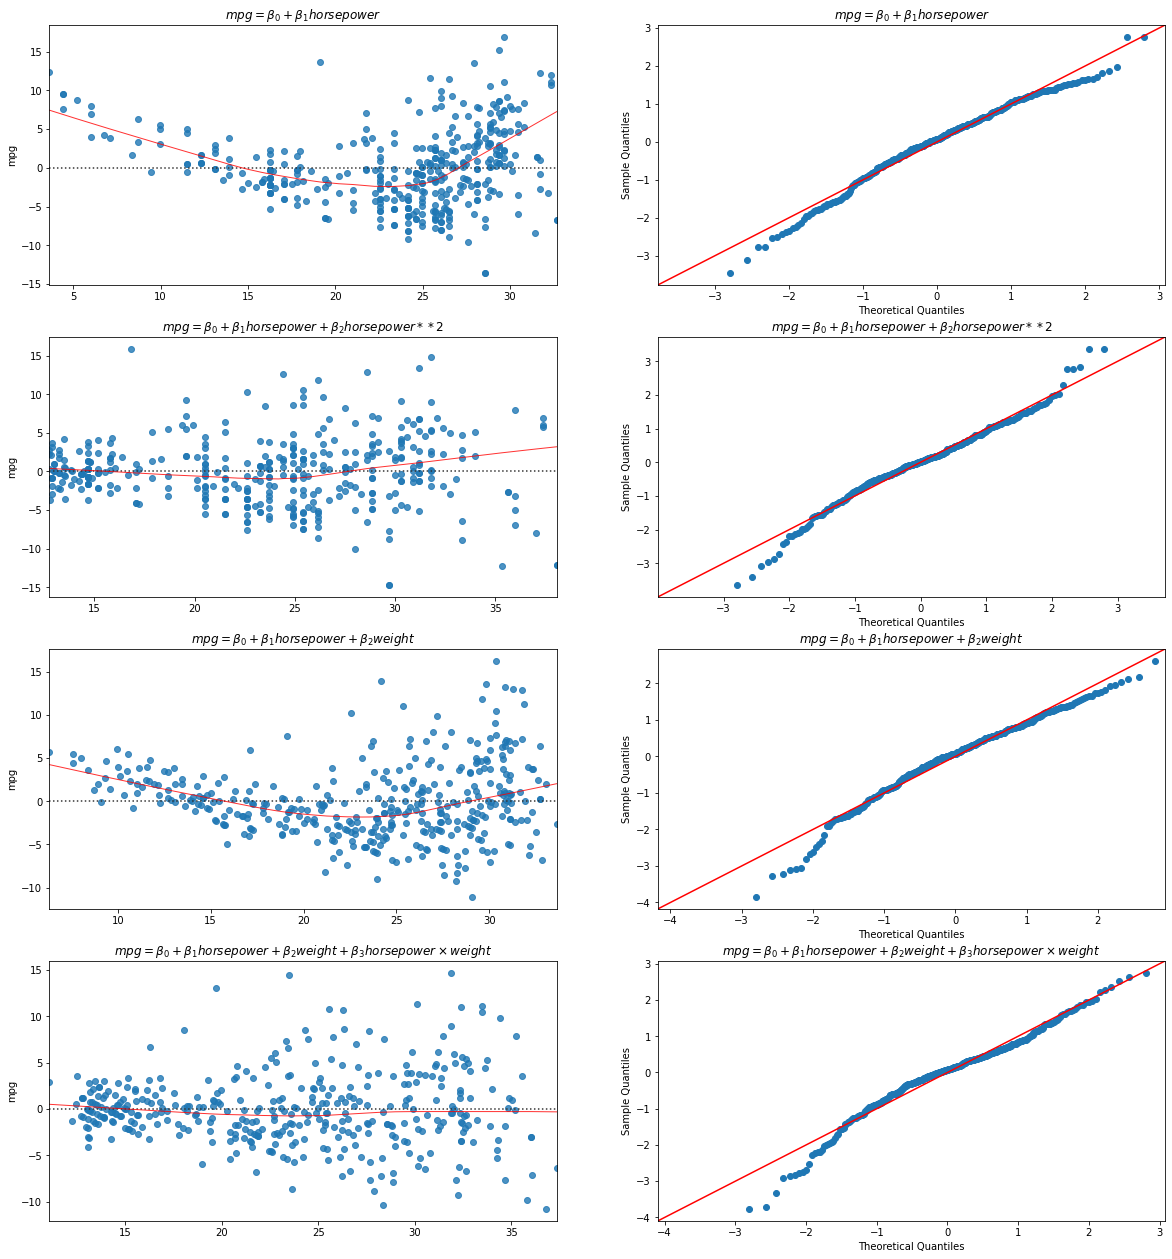

In [549]:
fitted = ols("mpg ~ horsepower", data.dropna()).fit().fittedvalues.fillna(0)
plt.figure(figsize=(20,22))
sns.residplot(x=fitted, y='mpg', data=data.dropna(),lowess=True,line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8}, ax=plt.subplot(421))
plt.title("$mpg = \\beta_0 + \\beta_1 horsepower$")
sm.qqplot(fitted-data.dropna()['mpg'], line='45',fit=True, ax=plt.subplot(422))
plt.title("$mpg = \\beta_0 + \\beta_1 horsepower$")

fitted = ols("mpg ~ horsepower + I(horsepower**2)", data.dropna()).fit().fittedvalues.fillna(0)
sns.residplot(x=fitted, y='mpg', data=data.dropna(),lowess=True,line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8}, ax=plt.subplot(423))
plt.title("$mpg = \\beta_0 + \\beta_1 horsepower + \\beta_2 horsepower**2$")
sm.qqplot(fitted-data.dropna()['mpg'], line='45',fit=True, ax=plt.subplot(424))
plt.title("$mpg = \\beta_0 + \\beta_1 horsepower + \\beta_2 horsepower**2$")


fitted = ols("mpg ~ horsepower + weight", data.dropna()).fit().fittedvalues.fillna(0)
sns.residplot(x=fitted, y='mpg', data=data.dropna(),lowess=True,line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8}, ax=plt.subplot(425))
plt.title("$mpg = \\beta_0 + \\beta_1 horsepower + \\beta_2 weight$")
sm.qqplot(fitted-data.dropna()['mpg'], line='45',fit=True, ax=plt.subplot(426))
plt.title("$mpg = \\beta_0 + \\beta_1 horsepower + \\beta_2 weight$")

fitted = ols("mpg ~ horsepower + weight + horsepower*weight", data.dropna()).fit().fittedvalues.fillna(0)
sns.residplot(x=fitted, y='mpg', data=data.dropna(),lowess=True,line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8}, ax=plt.subplot(427))
plt.title("$mpg = \\beta_0 + \\beta_1 horsepower + \\beta_2 weight + \\beta_3 horsepower \\times weight$")
sm.qqplot(fitted-data.dropna()['mpg'], line='45',fit=True, ax=plt.subplot(428))
plt.title("$mpg = \\beta_0 + \\beta_1 horsepower + \\beta_2 weight + \\beta_3 horsepower \\times weight$")
plt.show()

From the plot, we can see that some models have residuals less correlated with the predicted variable and quantiles closer to the normal distribution. This happens when the model explains better the variance of the predicted variable. In particular, we can note that the quadratic model (second row) and the one with the interaction term (last row) are a much better fit than the purely linear models (other two rows).

## Collinearity and Regularization Techniques

When fitting a multiple linear regressor, we should bear in mind that having two very correlated variables can lead to a poor model. For instance, in the case of perfectly correlated variables, two rows of the $\mathbf{X}$ matrix will be linearly dependent (one can be computed as a linear function of the other), hence the determinant of $\mathbf{X}^T\mathbf{X}$ will be zero, the matrix cannot be inverted, and the coefficients cannot be estimated.

Even if two variables are nearly collinear (strongly correlated), the $\mathbf{X}^T\mathbf{X}$ matrix will be ill conditioned and the parameters will be estimated with high numerical imprecision.

In general, when there is collinearity between two variables (or even **multicollinearity**, involving more than two variables), **the results of the multiple linear regressor cannot be trusted**. In such cases, we can try to remove the correlated variables (we can identify correlated variables with the correlation matrix), apply regularization techniques (discussed later) or perform Principal Component Analysis (PCA), which aims to provide a set of decorrelated features from $\mathbf{X}$. The PCA method will be presented later.

### Ridge Regression
One way to remove collinearity is to **remove those variables which are highly correlated with other variables**. This will effectively remove collinearity and solve the instability issues of linear regression. However, when there is a large number of predictors, this approach may not be very convenient. Also, it is not always clear which predictors to remove and which ones to keep, especially in the case of **multicollinearity** (sets of more than two variables which are highly correlated).

A "**soft approach**" would be to feed all variables to the model and **encourage it to set some of the coefficients to zero**. If we could do this, the model would **effectively select which variables to exclude from the model**, hence releasing us from making a hard decision.

This can be done by changing our cost function, the RSS. Recall that the RSS of linear regression (Ordinary Least Squares) can be written as:

$$RSS = \sum_{i=1}^m (y_i - \beta_0 - \sum_{j=1}^n \beta_j x_{ij})^2$$

where $x_{ij}$ is the value of the $x_j$ variable in the $i^{th}$ observation.

We can write the cost function as follows:

$$\sum_{i=1}^m (y_i - \beta_0 - \sum_{j=1}^n \beta_j x_{ij})^2 + \lambda \sum_{j=1}^n \beta_j^2 = RSS + \lambda \sum_{j=1}^n \beta_j^2$$

In practice, we are adding the following term:

$\sum_{j=1}^n \beta_j^2$

weighted by a parameter $\lambda$. The term above **penalizes solutions with large values for the coefficients $\beta_j$, hence encouraging the model to put some of the variables to zero, or close to zero**. This term is called "regularization term" and a linear regressor fit by minimizing this new cost function is called a **ridge regressor**.

The cost function has a parameter $\lambda$ which must be set as a constant. These kinds of parameters which we need to specify manually and are not computed from the data, are called **hyperparameters**. In practice, $\lambda$ controls **how much we want to regularize the linear regressor**. The higher the value of $\lambda$, the stronger the regularization will be, hence encouraging the model to select small values of $\beta_j$ or set some of them to zero.

To avoid $\lambda$ having different effects depending on the unit measures of the given variables, it is common to **z-score all variables before computing a ridge regressor**.

This is shown in the following plot, which shows the values of the parameters $\beta_j$ when a ridge regression model is fit with different values of $\lambda$:

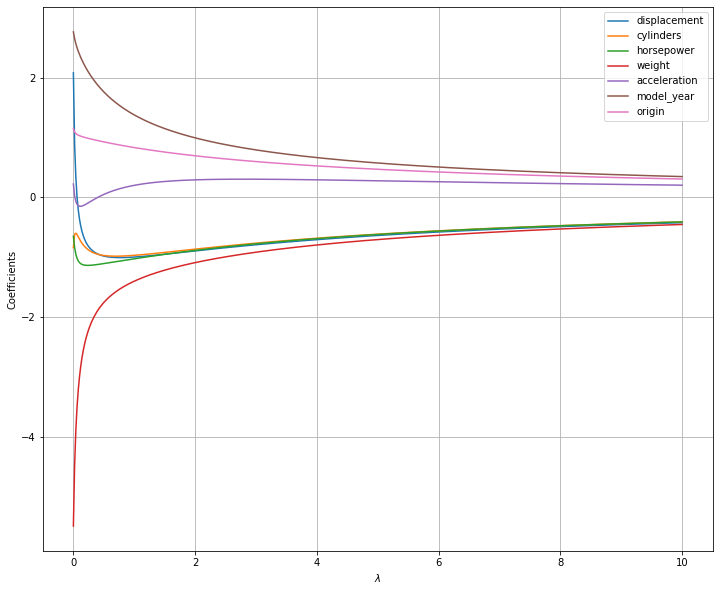

In [36]:
from scipy.stats import zscore
from ucimlrepo import fetch_ucirepo 
from statsmodels.formula.api import ols
import pandas as pd
  
# fetch dataset 
auto_mpg = fetch_ucirepo(id=9) 
  
# data (as pandas dataframes) 
X = auto_mpg.data.features 
y = auto_mpg.data.targets 
  
data = X.join(y)

data2=data.dropna().drop('mpg',axis=1).apply(zscore).join(data.dropna()['mpg'])
dd=[]
for alpha in np.linspace(0,10,500):
    d=ols("mpg ~ displacement + cylinders + horsepower + weight + acceleration + model_year + origin", data2).fit_regularized(L1_wt=0, alpha=alpha).params

    
    d= pd.Series(
        {
            c:v for c,v in zip(["Intercept","displacement", "cylinders", "horsepower" ,"weight" ,"acceleration", "model_year" ,"origin"],d)
        }
        )
    d['alpha']=alpha
    dd.append(d)
dd=pd.concat(dd,axis=1).T
dd.drop('Intercept',axis=1).plot(x='alpha', figsize=(12,10))
plt.xlabel("$\lambda$")
plt.ylabel("Coefficients")
plt.grid()

As can be seen, the coefficient values are gradually shrunk towards zero as the value of $\lambda$ increases. Interestingly, the model **"decides"** which coefficients to shrink. For instance, for low values of $\lambda$, `weight` is shrunk, while `acceleration` is first shrunk, then allowed to be larger than zero. This is due to the fact that, the regularization term acts as a sort of "soft constraint" encouraging the model to find smaller weights, while still finding a good solution.

It can be shown (but we will not see it formally), that ridge regression **reduces the variance of coefficient estimates**. At the same time, **the bias is increased**. So, finding a good value of $\lambda$ allows to **control the bias-variance trade-off**.

#### Interpretation of the ridge regression coefficients
Let us compare the parameters obtained through a ridge regressor with those obtained with a linear regressor (OLS):

In [54]:
params = pd.DataFrame({'variables':['displacement','cylinders' , 'horsepower' , 'weight' , 'acceleration' , 'model_year' , 'origin'], 'ridge_params':ols("mpg ~ displacement + cylinders + horsepower + weight + acceleration + model_year + origin", data2).fit_regularized(L1_wt=0, alpha=1).params[1:],'ols_params':ols("mpg ~ displacement + cylinders + horsepower + weight + acceleration + model_year + origin", data2).fit().params[1:]}).set_index('variables')
params

,ridge_params,ols_params
variables,,
displacement,-0.998445,2.079303
cylinders,-0.969852,-0.840519
horsepower,-1.027231,-0.651636
weight,-1.401530,-5.492050
acceleration,0.199621,0.222014
model_year,1.375600,2.762119
origin,0.830411,1.147316


As we can see, the ridge parameters has a smaller scale. This is due to the regularization term. As a result, the parameters **cannot be interpreted statistically as the ones of a linear regressor**. Instead, we can interpret them as denoting the relative importance of the variable to the prediction.

### Lasso Regression

The ridge regressor will in general set coefficients exactly to zero only for very large values of $\lambda$. An alternative model which has been shown to set coefficients more likely to zero is the **lasso regressor**. The main difference with ridge regression is in the regularization term. The new cost function of a lasso regressor is as follows:

$$\sum_{i=1}^m (y_i - \beta_0 - \sum_{j=1}^n \beta_j x_{ij})^2 + \lambda \sum_{j=1}^n |\beta_j| = RSS + \lambda \sum_{j=1}^n |\beta_j|$$

We basically replaced the norm of the coefficients with the absolute values (this is called an L1 norm), which has the effect to encourage the model to set values to zero.

The figure below shows how the coefficient estimates change for different values of $\lambda$:


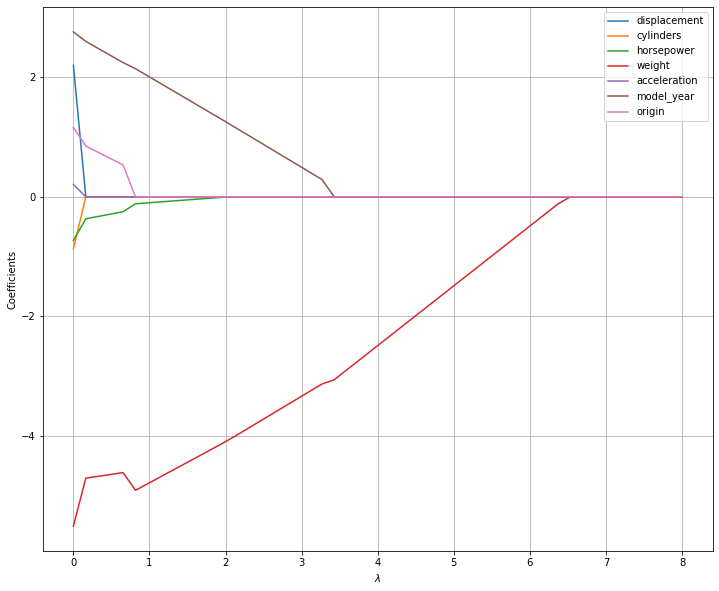

In [60]:
from scipy.stats import zscore
from ucimlrepo import fetch_ucirepo 
from statsmodels.formula.api import ols
import pandas as pd
  
# fetch dataset 
auto_mpg = fetch_ucirepo(id=9) 
  
# data (as pandas dataframes) 
X = auto_mpg.data.features 
y = auto_mpg.data.targets 
  
data = X.join(y)

data2=data.dropna().drop('mpg',axis=1).apply(zscore).join(data.dropna()['mpg'])
dd=[]
for alpha in np.linspace(0,8,50):
    d=ols("mpg ~ displacement + cylinders + horsepower + weight + acceleration + model_year + origin", data2).fit_regularized(L1_wt=1, alpha=alpha).params

    
    d= pd.Series(
        {
            c:v for c,v in zip(["Intercept","displacement", "cylinders", "horsepower" ,"weight" ,"acceleration", "model_year" ,"origin"],d)
        }
        )
    d['alpha']=alpha
    dd.append(d)
dd=pd.concat(dd,axis=1).T
dd.drop('Intercept',axis=1).plot(x='alpha', figsize=(12,10))
plt.xlabel("$\lambda$")
plt.ylabel("Coefficients")
plt.grid()

As can be seen, the model now makes "hard choices" on whether a value should be set to zero or not, thus performing variable selection. Once Lasso regression identified the variables to remove, we could create a reduced dataset keeping only columns with nonzero coefficients and fit a regular, interpretable, linear regressor with the original, non standardized, data.

## References

* Chapter 3 of \[1\]
* Parts of chapter 11 of \[2\]

\[1\] Heumann, Christian, and Michael Schomaker Shalabh. Introduction to statistics and data analysis. Springer International Publishing Switzerland, 2016.

\[2\] James, Gareth Gareth Michael. An introduction to statistical learning: with applications in Python, 2023.https://www.statlearning.com